In [27]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
# %matplotlib tk

In [28]:
# Load files
with open('results/asushared_swissmetro.pickle', 'rb') as handle:
    mg_U, V, p = pickle.load(handle)

In [29]:
# Load data
data_train = pd.read_csv('data/swissmetro_clean_train.csv')
data_test = pd.read_csv('data/swissmetro_clean_test.csv')

# Set scalars
J = 3
K = 2

# Set variables
Xvars = ['TRAIN_COST','TRAIN_TT','TRAIN_HE','SM_COST','SM_TT','SM_HE','CAR_COST','CAR_TT']
X_train = data_train[Xvars].to_numpy() * 100
X_test = data_test[Xvars].to_numpy() * 100
X = np.r_[X_train,X_test]

y_train = data_train['CHOICE'].to_numpy() - 1
y_test = data_test['CHOICE'].to_numpy() - 1
y = np.r_[y_train,y_test]

In [30]:
mg_U_array = np.mean(np.stack(mg_U,axis=3),axis=3)
V_array = np.mean(np.stack(V,axis=2),axis=2)

In [31]:
# Get marginal utilities
mu_train_cost = mg_U_array[:,0,0]
mu_train_tt   = mg_U_array[:,1,0]
mu_train_he   = mg_U_array[:,2,0]
mu_sm_cost    = mg_U_array[:,3,1]
mu_sm_tt      = mg_U_array[:,4,1]
mu_sm_he      = mg_U_array[:,5,1]
mu_car_cost   = mg_U_array[:,6,2]
mu_car_tt     = mg_U_array[:,7,2]

mu_array = np.c_[mu_train_cost,mu_train_tt,mu_train_he,mu_sm_cost,mu_sm_tt,mu_sm_he,mu_car_cost,mu_car_tt]

# Create statistics
mu_mean   = np.mean(mu_array,axis=0)
mu_std    = np.std(mu_array,axis=0)
mu_median = np.median(mu_array,axis=0)

In [32]:
# Get percentiles of VTT
mu_perc=np.quantile(mu_array,q=[0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1],axis=0)
pd.DataFrame(mu_perc,columns=Xvars)

,TRAIN_COST,TRAIN_TT,TRAIN_HE,SM_COST,SM_TT,SM_HE,CAR_COST,CAR_TT
0,-2.387775,-3.468018,-1.344716,-2.387775,-2.729256,-1.932210,-2.377783,-1.222272
1,-2.387775,-3.175169,-1.298529,-2.387775,-2.611900,-1.920441,-2.234814,-1.217658
2,-2.328062,-3.068019,-1.268114,-2.292702,-2.567380,-1.907496,-2.154858,-1.210755
3,-2.132838,-2.827003,-1.158695,-2.037843,-2.445224,-1.863262,-2.012574,-1.197476
4,-1.973701,-2.562069,-1.084061,-1.837383,-2.355630,-1.703510,-1.837383,-1.181706
5,-1.794984,-2.314601,-1.001196,-1.578381,-2.264420,-1.347961,-1.679980,-1.162447
6,-1.607415,-2.030307,-0.907003,-1.377700,-2.161015,-1.118867,-1.563877,-1.139978
7,-1.405923,-1.822882,-0.827941,-1.173790,-2.042289,-0.910330,-1.335758,-1.107859
8,-1.200060,-1.586965,-0.729344,-0.918847,-1.897011,-0.729629,-1.173790,-1.071881
9,-0.907727,-1.336961,-0.580717,-0.610640,-1.727340,-0.537485,-0.952783,-1.008034


In [33]:
df_mu = pd.DataFrame(np.c_[mu_mean,mu_median],index=Xvars,columns=['Mean','Median'])
# df_mu.to_csv('results/asushared_swissmetro_mu.csv')
df_mu

,Mean,Median
TRAIN_COST,-1.504222,-1.607415
TRAIN_TT,-2.052425,-2.030307
TRAIN_HE,-0.887034,-0.907003
SM_COST,-1.333640,-1.377700
SM_TT,-2.057684,-2.161015
SM_HE,-1.117540,-1.118867
CAR_COST,-1.473718,-1.563877
CAR_TT,-1.101071,-1.139978


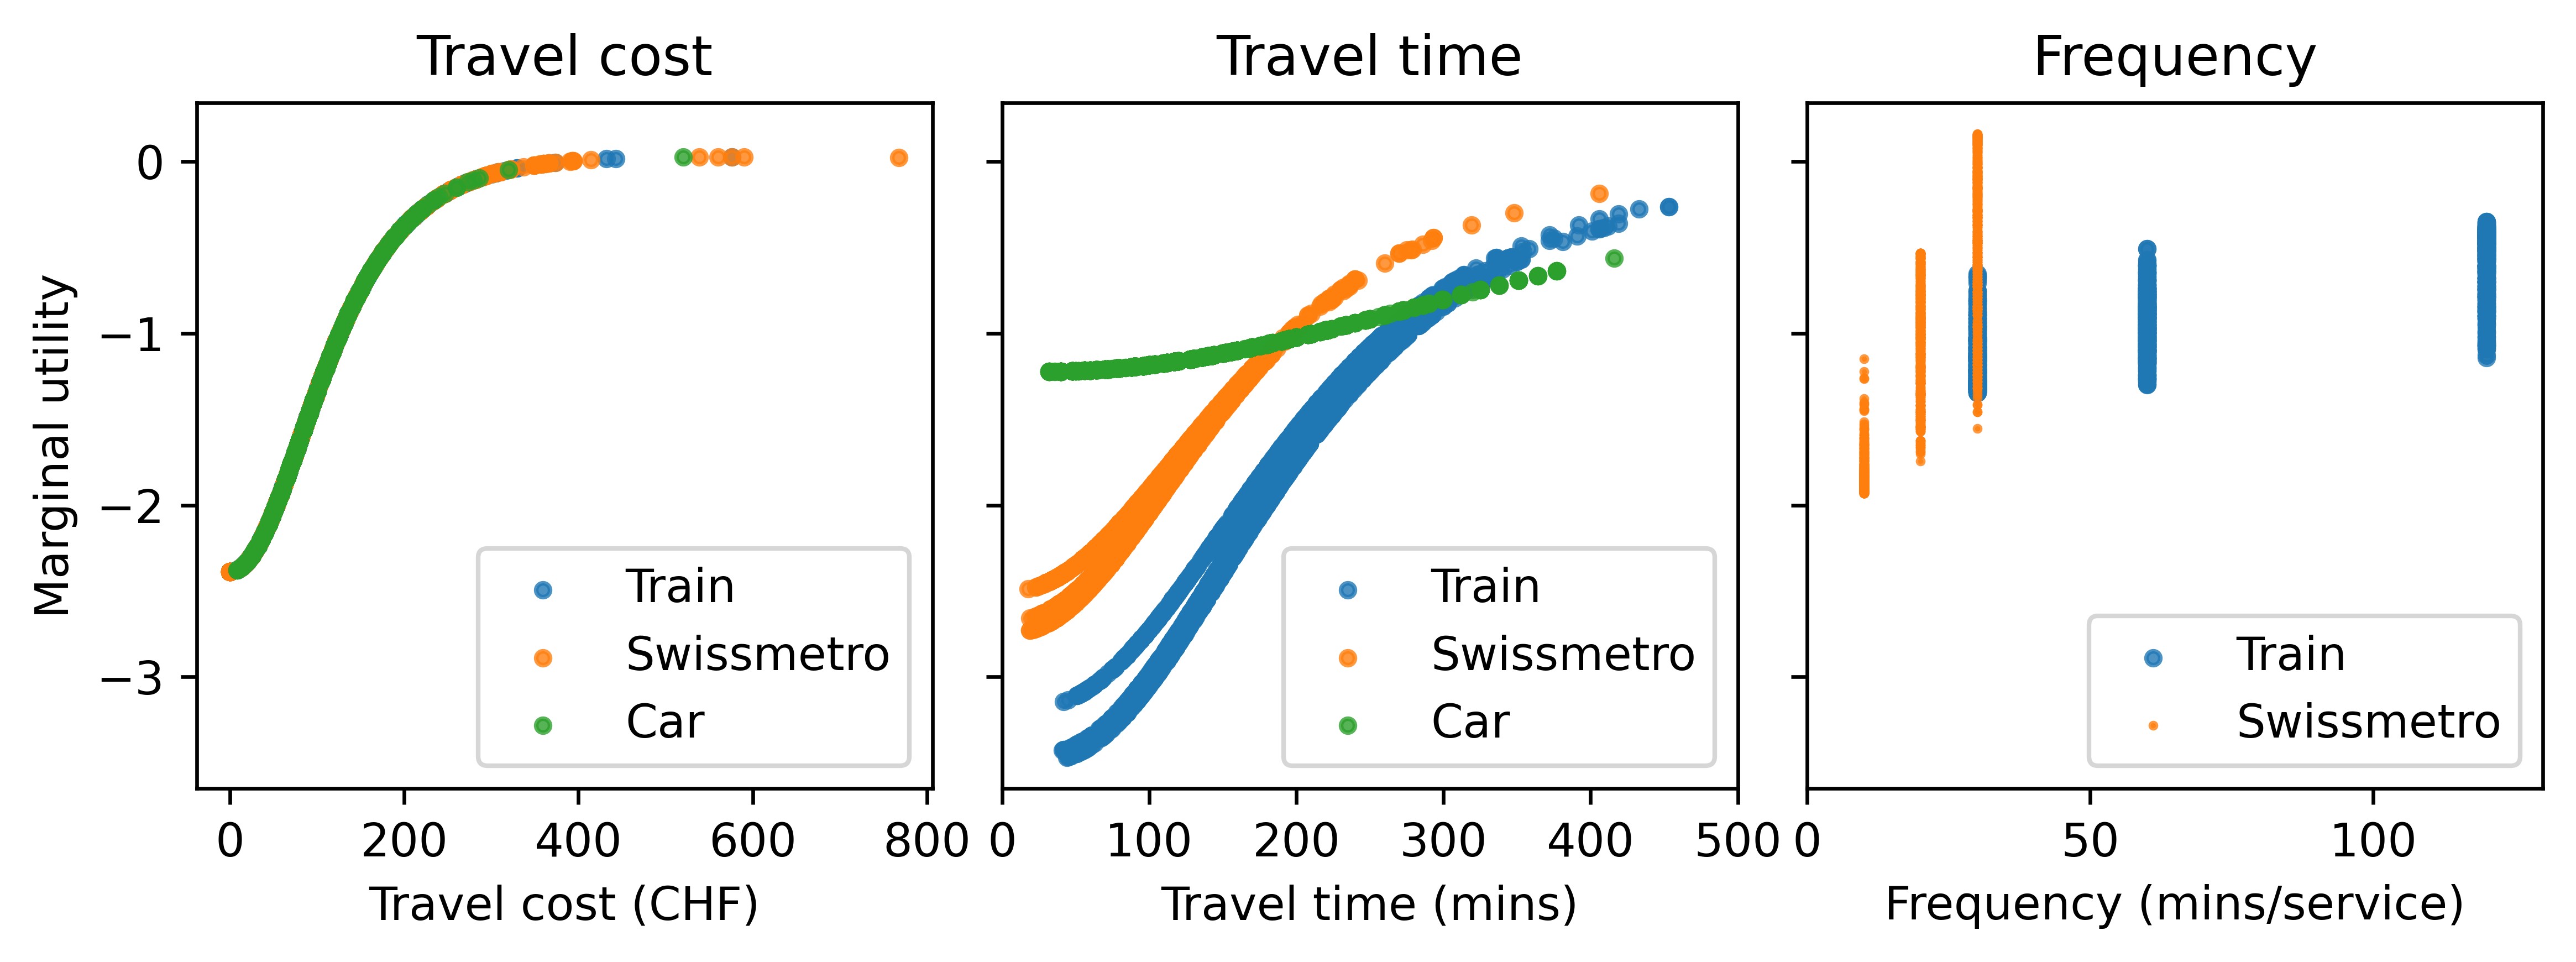

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(8,3),dpi=600,sharey=True)
ax1.scatter(X_test[:,0],mu_array[:,0],marker='.',alpha=0.8)
ax1.scatter(X_test[:,3],mu_array[:,3],marker='.',alpha=0.8)
ax1.scatter(X_test[:,6],mu_array[:,6],marker='.',alpha=0.8)

ax1.legend(['Train','Swissmetro','Car'],loc='lower right')
ax1.set_title('Travel cost')
ax1.set_ylabel('Marginal utility')
ax1.set_xlabel('Travel cost (CHF)')

ax2.scatter(X_test[:,1],mu_array[:,1],marker='.',alpha=0.8)
ax2.scatter(X_test[:,4],mu_array[:,4],marker='.',alpha=0.8)
ax2.scatter(X_test[:,7],mu_array[:,7],marker='.',alpha=0.8)

ax2.legend(['Train','Swissmetro','Car'],loc='lower right')
ax2.set_title('Travel time')
# ax2.set_ylabel('MU of travel cost')
ax2.set_xlabel('Travel time (mins)')
ax2.set_xlim((0,500))

ax3.scatter(X_test[:,2],mu_array[:,2],marker='.',alpha=0.8)
ax3.scatter(X_test[:,5],mu_array[:,5],marker='.',alpha=0.8,s=5)
ax3.set_xlim((0,130))

ax3.legend(['Train','Swissmetro'],loc='lower right')
ax3.set_title('Frequency')
# ax3.set_ylabel('MU of travel cost')
ax3.set_xlabel('Frequency (mins/service)')

plt.tight_layout()
# plt.savefig('figs/mu_swissmetro.png')
plt.show()

In [36]:
# Get vowt
vtt_train = mg_U_array[:,1,0]/mg_U_array[:,0,0]
vtt_sm = mg_U_array[:,4,1]/mg_U_array[:,3,1]
vtt_car = mg_U_array[:,7,2]/mg_U_array[:,6,2]

vtt_array = np.c_[vtt_train,vtt_sm,vtt_car]

# Create statistics
vtt_mean   = np.mean(vtt_array,axis=0)
vtt_std    = np.std(vtt_array,axis=0)
vtt_median = np.median(vtt_array,axis=0)

vtt_names = ['TRAIN', 'SM', 'CAR']

In [37]:
# Get percentiles of VTT
vtt_perc=np.quantile(vtt_array,q=[0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1],axis=0)
pd.DataFrame(vtt_perc,columns=vtt_names)

,TRAIN,SM,CAR
0,-218.963204,-8627.520902,-46.956533
1,0.618159,0.773306,0.536560
2,0.775760,0.918770,0.551113
3,0.955418,1.063665,0.583603
4,1.104435,1.149546,0.619841
5,1.210352,1.264239,0.665106
6,1.317934,1.453125,0.719673
7,1.430362,1.691500,0.793334
8,1.607990,2.081665,0.905495
9,2.016990,3.109759,1.094145


In [40]:
# Drop outliers
vtt_train_clean = vtt_train[(vtt_train>=0) & (vtt_train <= vtt_perc[-2,0])]
vtt_sm_clean = vtt_sm[(vtt_sm>=0) & (vtt_sm <= vtt_perc[-2,1])]
vtt_car_clean = vtt_car[(vtt_car>=0) & (vtt_car <= vtt_perc[-2,2])]

vtt_train_outliers = (vtt_train>=0) & (vtt_train <= vtt_perc[-2,0])
vtt_sm_outliers = (vtt_sm>=0) & (vtt_sm <= vtt_perc[-2,1])
vtt_car_outliers = (vtt_car>=0) & (vtt_car <= vtt_perc[-2,2])

# Create clean VTT statistic arrays
mean_vtt_array = np.r_[np.mean(vtt_train_clean),np.mean(vtt_sm_clean),np.mean(vtt_car_clean)]
median_vtt_array = np.r_[np.median(vtt_train_clean),np.median(vtt_sm_clean),np.median(vtt_car_clean)]
std_vtt_array = np.r_[np.std(vtt_train_clean),np.std(vtt_sm_clean),np.std(vtt_car_clean)]

min_vtt_array = np.r_[np.min(vtt_train_clean),np.min(vtt_sm_clean),np.min(vtt_car_clean)]
max_vtt_array = np.r_[np.max(vtt_train_clean),np.max(vtt_sm_clean),np.max(vtt_car_clean)]

In [41]:
df_vtt = pd.DataFrame(np.c_[mean_vtt_array,median_vtt_array],index=vtt_names,columns=['Mean','Median'])
# df_vtt.to_csv('results/asushared_swissmetro_vtt.csv')
df_vtt

,Mean,Median
TRAIN,1.515399,1.295890
SM,2.099272,1.419605
CAR,0.807489,0.706692


In [43]:
# Get VoWT
vowt_train      = mu_train_he/mu_train_cost
vowt_sm         = mu_sm_he/mu_sm_cost

vowt_array = np.c_[vowt_train,vowt_sm]

# Create statistics
vowt_mean   = np.mean(vowt_array,axis=0)
vowt_std    = np.std(vowt_array,axis=0)
vowt_median = np.median(vowt_array,axis=0)

vowt_names = ['TRAIN', 'SM']

In [44]:
# Get percentiles of VTT
vowt_perc=np.quantile(vowt_array,q=[0,.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1],axis=0)
pd.DataFrame(vowt_perc,columns=vowt_names)

,TRAIN,SM
0,-84.902473,-6212.854232
1,0.260991,-0.031752
2,0.315777,0.116856
3,0.381190,0.365305
4,0.450810,0.529427
5,0.518042,0.665271
6,0.570771,0.809806
7,0.645062,0.964165
8,0.747301,1.245651
9,0.959488,1.745056


In [46]:
# Drop outliers
vowt_train_clean = vowt_train[(vowt_train>=0) & (vowt_train <= vowt_perc[-2,0])]
vowt_sm_clean = vowt_sm[(vowt_sm>=0) & (vowt_sm <= vowt_perc[-2,1])]

vowt_train_outliers = (vowt_train>=0) & (vowt_train <= vowt_perc[-2,0])
vowt_sm_outliers = (vowt_sm>=0) & (vowt_sm <= vowt_perc[-2,1])

# Create clean VoWT statistic arrays
mean_vowt_array = np.r_[np.mean(vowt_train_clean),np.mean(vowt_sm_clean)]
median_vowt_array = np.r_[np.median(vowt_train_clean),np.median(vowt_sm_clean)]

In [47]:
df_vowt = pd.DataFrame(np.c_[mean_vowt_array,median_vowt_array],index=vowt_names,columns=['Mean','Median'])
# df_vowt.to_csv('results/asushared_swissmetro_vowt.csv')
df_vowt

,Mean,Median
TRAIN,0.685959,0.561989
SM,1.134473,0.814803


In [58]:
mu_df = pd.DataFrame(mu_array,columns=Xvars)
vtt_df = pd.DataFrame(vtt_array,columns=vtt_names)
vowt_df = pd.DataFrame(vowt_array,columns=vowt_names)
X_df = pd.DataFrame(X_test,columns=Xvars)/100

vtt_outliers = pd.DataFrame(np.c_[vtt_train_outliers,vtt_sm_outliers,vtt_car_outliers],columns=vtt_names)
vowt_outliers = pd.DataFrame(np.c_[vowt_train_outliers,vowt_sm_outliers],columns=vowt_names)

In [59]:
# Create dataframe with attributes, MU and VTT
design_mu_vtt_df = pd.concat([X_df,mu_df,vtt_df,vowt_df,vtt_outliers,vowt_outliers],axis=1,keys=['X','MU','VTT','VoWT','VTT_outliers','VoWT_outliers'])

In [60]:
# design_mu_vtt_df.to_excel('tables/design_mu_vtt_df_swissmetro.xlsx')

In [61]:
# Calculate mean VTT for 55-65 min trips based on the test sample
vtt_train_less60 = design_mu_vtt_df['VTT']['TRAIN'].loc[
    (design_mu_vtt_df['X']['TRAIN_TT'] <0.6) & (design_mu_vtt_df['VTT_outliers']['TRAIN'] == 1)]

vtt_train_60_90 = design_mu_vtt_df['VTT']['TRAIN'].loc[
    ((design_mu_vtt_df['X']['TRAIN_TT'] >=0.60) & (design_mu_vtt_df['X']['TRAIN_TT'] <0.90)) & (design_mu_vtt_df['VTT_outliers']['TRAIN'] == 1)]

vtt_train_90_120 = design_mu_vtt_df['VTT']['TRAIN'].loc[
    ((design_mu_vtt_df['X']['TRAIN_TT'] >=0.90) & (design_mu_vtt_df['X']['TRAIN_TT'] <1.2)) & (design_mu_vtt_df['VTT_outliers']['TRAIN'] == 1)]

vtt_train_120_180 = design_mu_vtt_df['VTT']['TRAIN'].loc[
    ((design_mu_vtt_df['X']['TRAIN_TT'] >=1.2) & (design_mu_vtt_df['X']['TRAIN_TT'] <1.8)) & (design_mu_vtt_df['VTT_outliers']['TRAIN'] == 1)]

vtt_train_180_240 = design_mu_vtt_df['VTT']['TRAIN'].loc[
    ((design_mu_vtt_df['X']['TRAIN_TT'] >=1.8) & (design_mu_vtt_df['X']['TRAIN_TT'] <2.4)) & (design_mu_vtt_df['VTT_outliers']['TRAIN'] == 1)]

vtt_train_ranges = np.r_[vtt_train_less60.mean(),vtt_train_60_90.mean(),vtt_train_90_120.mean(),vtt_train_120_180.mean(),vtt_train_180_240.mean()]



vtt_sm_less60 = design_mu_vtt_df['VTT']['SM'].loc[
    (design_mu_vtt_df['X']['SM_TT'] <0.6) & (design_mu_vtt_df['VTT_outliers']['SM'] == 1)]

vtt_sm_60_90 = design_mu_vtt_df['VTT']['SM'].loc[
    ((design_mu_vtt_df['X']['SM_TT'] >=0.60) & (design_mu_vtt_df['X']['SM_TT'] <0.90)) & (design_mu_vtt_df['VTT_outliers']['SM'] == 1)]

vtt_sm_90_120 = design_mu_vtt_df['VTT']['SM'].loc[
    ((design_mu_vtt_df['X']['SM_TT'] >=0.90) & (design_mu_vtt_df['X']['SM_TT'] <1.2)) & (design_mu_vtt_df['VTT_outliers']['SM'] == 1)]

vtt_sm_120_180 = design_mu_vtt_df['VTT']['SM'].loc[
    ((design_mu_vtt_df['X']['SM_TT'] >=1.2) & (design_mu_vtt_df['X']['SM_TT'] <1.8)) & (design_mu_vtt_df['VTT_outliers']['SM'] == 1)]

vtt_sm_180_240 = design_mu_vtt_df['VTT']['SM'].loc[
    ((design_mu_vtt_df['X']['SM_TT'] >=1.8) & (design_mu_vtt_df['X']['SM_TT'] <2.4)) & (design_mu_vtt_df['VTT_outliers']['SM'] == 1)]

vtt_sm_ranges = np.r_[vtt_sm_less60.mean(),vtt_sm_60_90.mean(),vtt_sm_90_120.mean(),vtt_sm_120_180.mean(),vtt_sm_180_240.mean()]


vtt_car_less60 = design_mu_vtt_df['VTT']['CAR'].loc[
    (design_mu_vtt_df['X']['CAR_TT'] <0.6) & (design_mu_vtt_df['VTT_outliers']['CAR'] == 1)]

vtt_car_60_90 = design_mu_vtt_df['VTT']['CAR'].loc[
    ((design_mu_vtt_df['X']['CAR_TT'] >=0.60) & (design_mu_vtt_df['X']['CAR_TT'] <0.90)) & (design_mu_vtt_df['VTT_outliers']['CAR'] == 1)]

vtt_car_90_120 = design_mu_vtt_df['VTT']['CAR'].loc[
    ((design_mu_vtt_df['X']['CAR_TT'] >=0.90) & (design_mu_vtt_df['X']['CAR_TT'] <1.2)) & (design_mu_vtt_df['VTT_outliers']['CAR'] == 1)]

vtt_car_120_180 = design_mu_vtt_df['VTT']['CAR'].loc[
    ((design_mu_vtt_df['X']['CAR_TT'] >=1.2) & (design_mu_vtt_df['X']['CAR_TT'] <1.8)) & (design_mu_vtt_df['VTT_outliers']['CAR'] == 1)]

vtt_car_180_240 = design_mu_vtt_df['VTT']['CAR'].loc[
    ((design_mu_vtt_df['X']['CAR_TT'] >=1.8) & (design_mu_vtt_df['X']['CAR_TT'] <2.4)) & (design_mu_vtt_df['VTT_outliers']['CAR'] == 1)]

vtt_car_ranges = np.r_[vtt_car_less60.mean(),vtt_car_60_90.mean(),vtt_car_90_120.mean(),vtt_car_120_180.mean(),vtt_car_180_240.mean()]

vtt_ranges = np.c_[vtt_train_ranges,vtt_sm_ranges,vtt_car_ranges]

vtt_ranges

array([[1.81503423, 1.92506514, 0.58711738],
       [1.51949745, 2.33259417, 0.66143745],
       [1.63249925, 2.15763816, 0.67416164],
       [1.58070581, 2.00982909, 0.87181318],
       [1.5791615 , 1.51448381, 0.93422032]])

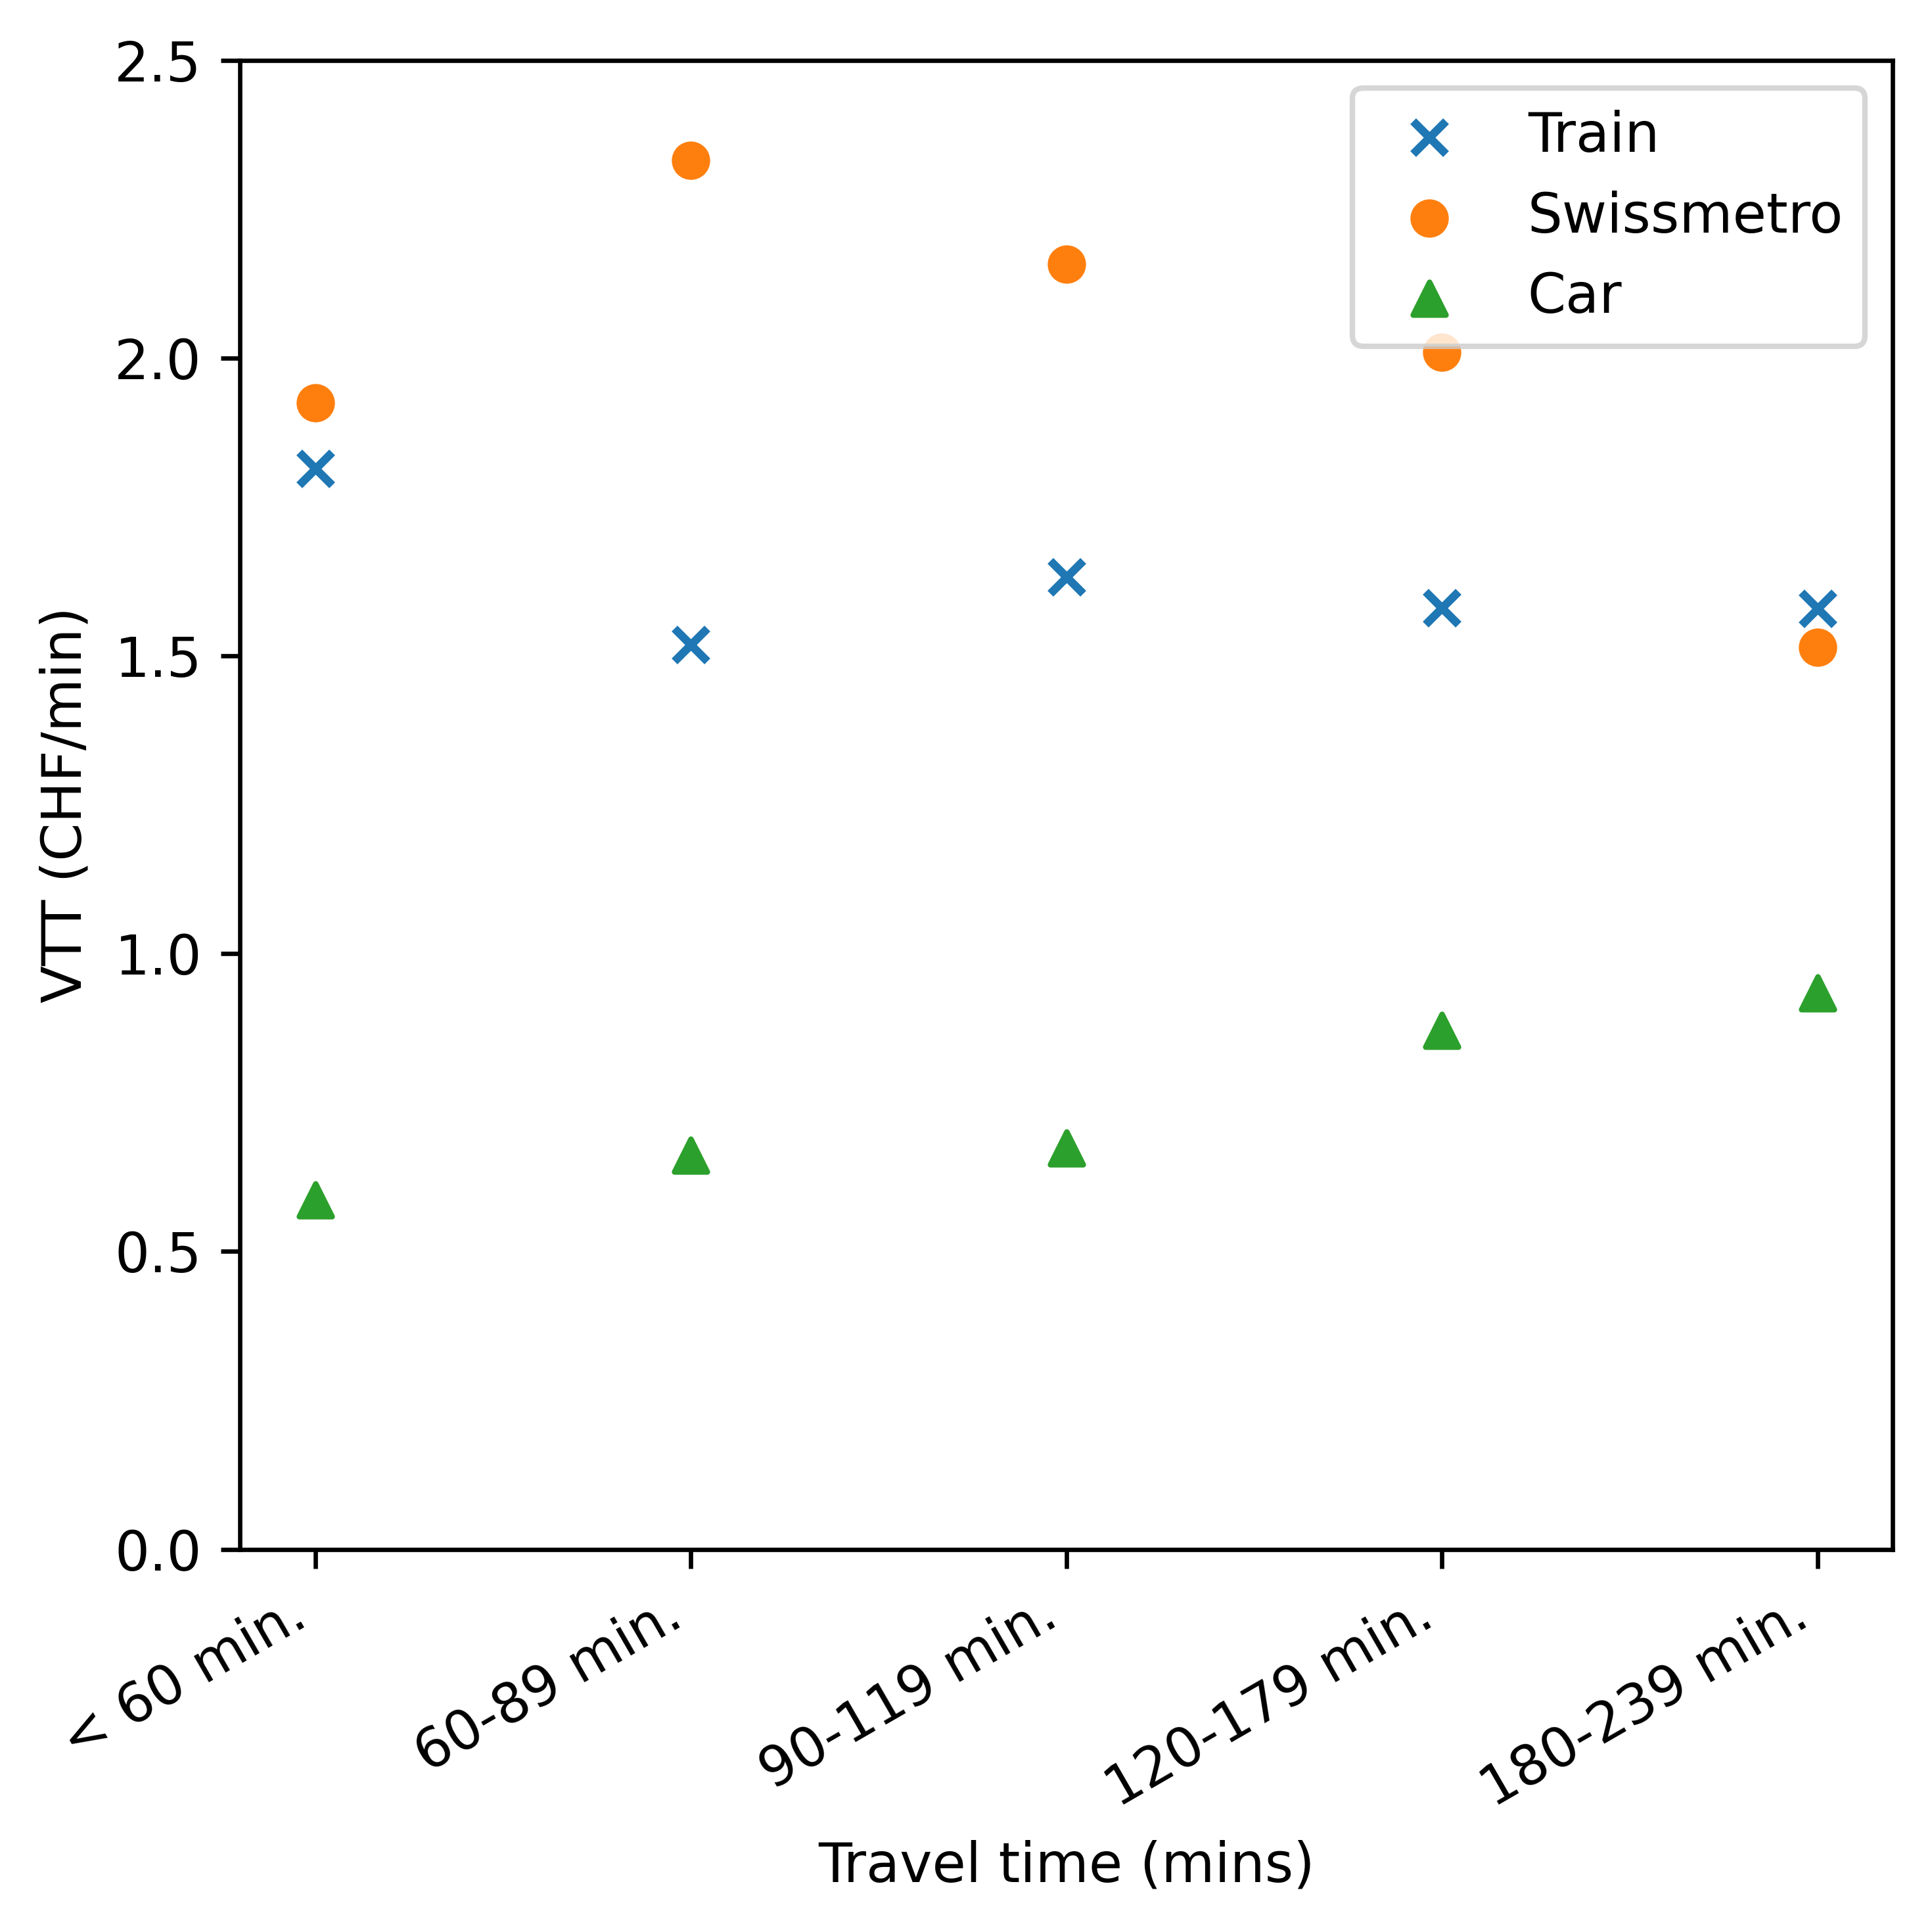

In [139]:
fig, ax = plt.subplots(1,1,dpi=600,figsize=(5,5))
ax.scatter(np.arange(5),vtt_ranges.T[0],marker='x')
ax.scatter(np.arange(5),vtt_ranges.T[1],marker='o')
ax.scatter(np.arange(5),vtt_ranges.T[2],marker='^')

# ax.plot(np.arange(5),vtt_ranges.T[0])
# ax.plot(np.arange(5),vtt_ranges.T[1])
# ax.plot(np.arange(5),vtt_ranges.T[2])

ax.set_ylabel('VTT (CHF/min)')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['< 60 min.','60-89 min.','90-119 min.','120-179 min.','180-239 min.'],ha='right',rotation=30)
ax.set_xlabel('Travel time (mins)')

ax.set_ylim((0,2.5))
plt.legend(['Train','Swissmetro','Car'])
plt.tight_layout()
plt.savefig('figs/vtt_groups.png')
plt.show()


In [63]:
# Calculate mean VoWT for 55-65 min trips based on the test sample
vowt_train_55_65 = design_mu_vtt_df['VoWT']['TRAIN'].loc[
    ((design_mu_vtt_df['X']['TRAIN_HE'] == 0.3)) & (design_mu_vtt_df['VoWT_outliers']['TRAIN'] == 1)].mean()

vowt_sm_55_65 = design_mu_vtt_df['VoWT']['SM'].loc[
    ((design_mu_vtt_df['X']['SM_HE'] == 0.3)) & (design_mu_vtt_df['VoWT_outliers']['SM'] == 1)].mean()

vowt_55_65 = np.r_[vowt_train_55_65,vowt_sm_55_65]
vowt_55_65

array([0.86674152, 0.62933402])